In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creat a set of random latitude and longitude combinations
lats = np.random.uniform(low= -90.000, high=90.000, size=1500)
lngs = np.random.uniform(low= -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the lats adn longs to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citypy module to determine city based on lat and long
from citipy import citipy

In [5]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kenai
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | sao joao da barra
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | sindand
City not found. Skipping...
Processing Record 6 of Set 1 | ganzhou
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | moron
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kadyy
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | ambon
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | vaini
Proce

Processing Record 40 of Set 4 | falealupo
City not found. Skipping...
Processing Record 41 of Set 4 | atuona
Processing Record 42 of Set 4 | eenhana
Processing Record 43 of Set 4 | esperance
Processing Record 44 of Set 4 | bongaigaon
Processing Record 45 of Set 4 | berlevag
Processing Record 46 of Set 4 | hailar
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | dzhebariki-khaya
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 50 of Set 4 | acajutla
Processing Record 1 of Set 5 | tawkar
City not found. Skipping...
Processing Record 2 of Set 5 | rungata
City not found. Skipping...
Processing Record 3 of Set 5 | lindsay
Processing Record 4 of Set 5 | magan
Processing Record 5 of Set 5 | kununurra
Processing Record 6 of Set 5 | upernavik
Processing Record 7 of Set 5 | chara
Processing Record 8 of Set 5 | vaitape
Processing Record 9 of Set 5 | san cristobal
Processing Record 10 of Set 5 | tomatlan
Processing Record 11 of Set 5 

Processing Record 27 of Set 8 | veraval
Processing Record 28 of Set 8 | half moon bay
Processing Record 29 of Set 8 | katsuura
Processing Record 30 of Set 8 | klaksvik
Processing Record 31 of Set 8 | mehamn
Processing Record 32 of Set 8 | shirokiy
Processing Record 33 of Set 8 | sinjah
City not found. Skipping...
Processing Record 34 of Set 8 | isangel
Processing Record 35 of Set 8 | agua verde
Processing Record 36 of Set 8 | paita
Processing Record 37 of Set 8 | pangnirtung
Processing Record 38 of Set 8 | hun
Processing Record 39 of Set 8 | huazolotitlan
City not found. Skipping...
Processing Record 40 of Set 8 | bejar
Processing Record 41 of Set 8 | jamsa
Processing Record 42 of Set 8 | obo
Processing Record 43 of Set 8 | lazo
Processing Record 44 of Set 8 | bage
Processing Record 45 of Set 8 | haines junction
Processing Record 46 of Set 8 | cabo san lucas
Processing Record 47 of Set 8 | tubruq
City not found. Skipping...
Processing Record 48 of Set 8 | dzheyrakh
Processing Record 49

Processing Record 11 of Set 12 | celestun
Processing Record 12 of Set 12 | gelemso
Processing Record 13 of Set 12 | mikropolis
Processing Record 14 of Set 12 | kalaleh
Processing Record 15 of Set 12 | hindoria
Processing Record 16 of Set 12 | dogondoutchi
Processing Record 17 of Set 12 | taburi
City not found. Skipping...
Processing Record 18 of Set 12 | leningradskiy
Processing Record 19 of Set 12 | minas
Processing Record 20 of Set 12 | coalville
Processing Record 21 of Set 12 | evans
Processing Record 22 of Set 12 | takoradi
Processing Record 23 of Set 12 | kpalime
Processing Record 24 of Set 12 | balimo
City not found. Skipping...
Processing Record 25 of Set 12 | ijaki
City not found. Skipping...
Processing Record 26 of Set 12 | guatire
Processing Record 27 of Set 12 | la paz
Processing Record 28 of Set 12 | wakkanai
Processing Record 29 of Set 12 | suruc
Processing Record 30 of Set 12 | naze
Processing Record 31 of Set 12 | oneonta
Processing Record 32 of Set 12 | adrar
Processing

In [10]:
len(city_data)

571

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kenai,60.5544,-151.2583,45.09,71,0,12.66,US,2022-05-08 16:27:07
1,Codrington,-38.2667,141.9667,46.15,86,23,5.19,AU,2022-05-08 16:27:07
2,Sao Joao Da Barra,-21.6403,-41.0511,80.69,65,36,11.63,BR,2022-05-08 16:27:08
3,Busselton,-33.6500,115.3333,58.60,84,3,4.63,AU,2022-05-08 16:27:08
4,Ganzhou,28.8184,115.4327,69.30,95,100,2.21,CN,2022-05-08 16:27:09
5,Cape Town,-33.9258,18.4232,64.27,70,0,5.75,ZA,2022-05-08 16:27:10
6,Punta Arenas,-53.1500,-70.9167,44.71,61,40,36.82,CL,2022-05-08 16:27:10
7,Moron,-34.6534,-58.6198,73.94,55,8,8.12,AR,2022-05-08 16:20:39
8,Rikitea,-23.1203,-134.9692,76.51,80,42,21.25,PF,2022-05-08 16:27:11
9,Kadyy,57.7870,43.1903,55.69,62,100,12.03,RU,2022-05-08 16:27:11


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kenai,US,2022-05-08 16:27:07,60.5544,-151.2583,45.09,71,0,12.66
1,Codrington,AU,2022-05-08 16:27:07,-38.2667,141.9667,46.15,86,23,5.19
2,Sao Joao Da Barra,BR,2022-05-08 16:27:08,-21.6403,-41.0511,80.69,65,36,11.63
3,Busselton,AU,2022-05-08 16:27:08,-33.6500,115.3333,58.60,84,3,4.63
4,Ganzhou,CN,2022-05-08 16:27:09,28.8184,115.4327,69.30,95,100,2.21
5,Cape Town,ZA,2022-05-08 16:27:10,-33.9258,18.4232,64.27,70,0,5.75
6,Punta Arenas,CL,2022-05-08 16:27:10,-53.1500,-70.9167,44.71,61,40,36.82
7,Moron,AR,2022-05-08 16:20:39,-34.6534,-58.6198,73.94,55,8,8.12
8,Rikitea,PF,2022-05-08 16:27:11,-23.1203,-134.9692,76.51,80,42,21.25
9,Kadyy,RU,2022-05-08 16:27:11,57.7870,43.1903,55.69,62,100,12.03


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

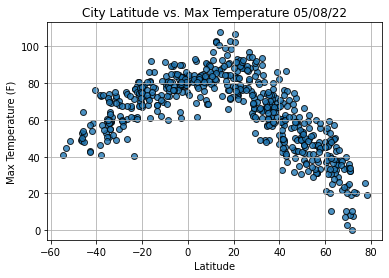

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

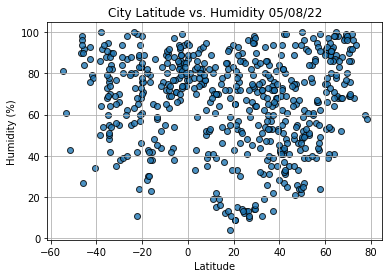

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

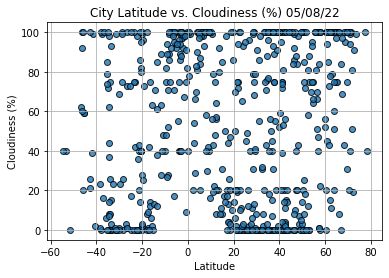

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

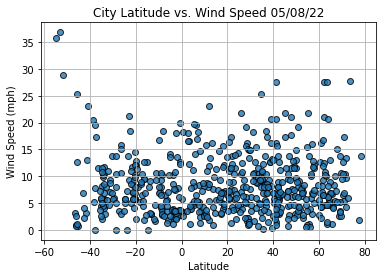

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-05-08 16:27:14
Lat                         -46.6
Lng                      168.3333
Max Temp                    48.79
Humidity                       90
Cloudiness                     62
Wind Speed                    3.2
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kenai,US,2022-05-08 16:27:07,60.5544,-151.2583,45.09,71,0,12.66
4,Ganzhou,CN,2022-05-08 16:27:09,28.8184,115.4327,69.30,95,100,2.21
9,Kadyy,RU,2022-05-08 16:27:11,57.7870,43.1903,55.69,62,100,12.03
10,Thompson,CA,2022-05-08 16:27:12,55.7435,-97.8558,46.56,87,100,13.80
16,Khatanga,RU,2022-05-08 16:27:15,71.9667,102.5000,7.70,96,19,9.64


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

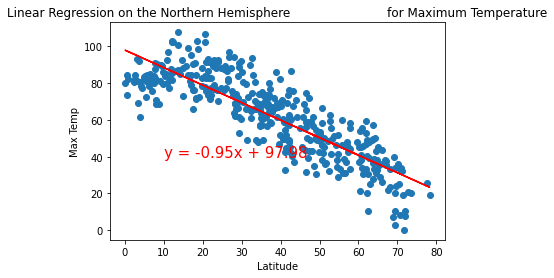

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


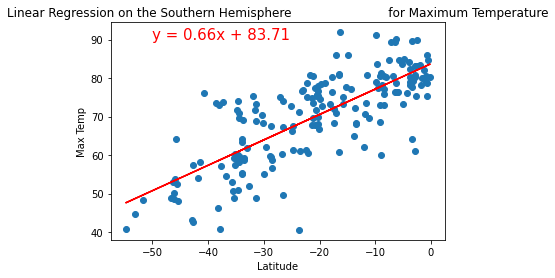

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

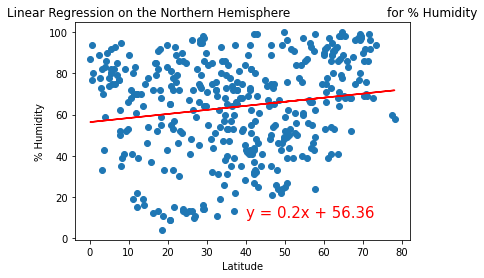

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

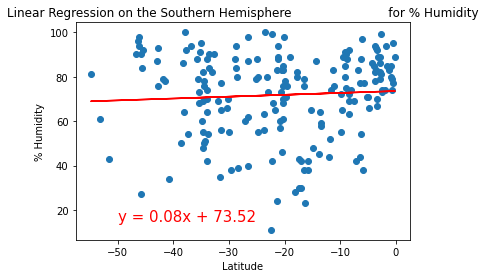

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

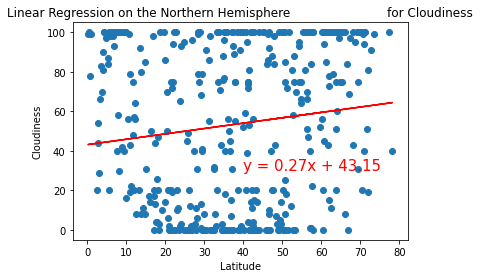

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,30))

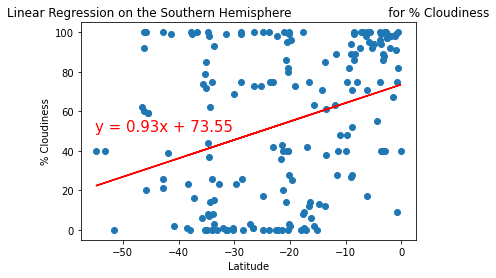

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,50))

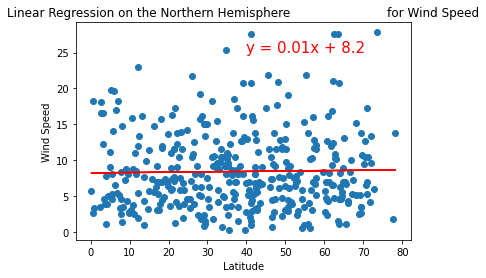

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))


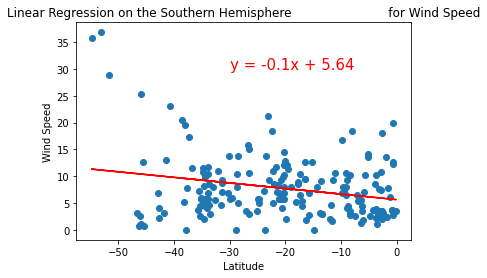

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,30))